## Visualizing Loans Awarded by Kiva

In this project, we will visualize and look for insights in a dataset from [Kaggle](https://www.kaggle.com/fkosmowski/kivadhsv1), that contains information about loans awarded by the non-profit [Kiva](https://www.kiva.org/).

Using Seaborn, we will explore the average loan amount by country using aggregated bar charts, and visualize the distribution of loan amount by project type and gender using box plots and violin plots.

In [26]:
# Let's first import the necessary modules

from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.ticker as mtick

In [27]:
# Loading and inspecting the data

df = pd.read_csv(r"C:\Users\amanp\OneDrive\Desktop\kiva_data.csv")
df.head(10)

,loan_amount,activity,country,gender
0,625,Food Production/Sales,Pakistan,female
1,250,Food Production/Sales,Pakistan,female
2,400,Food Production/Sales,Pakistan,female
3,400,Food Production/Sales,Pakistan,female
4,500,Food Production/Sales,Pakistan,female
5,500,Food Production/Sales,Pakistan,female
6,400,Food Production/Sales,Pakistan,female
7,500,Food Production/Sales,Pakistan,female
8,400,Food Production/Sales,Pakistan,female
9,450,Food Production/Sales,Pakistan,female


#### From the dataset, we observe:
- Each entry (row) in the dataset represents a loan that Kiva awarded to a particular project. 
- The loan_amount column shows the amount (in U.S. dollars) awarded to the project. 
- The activity column has the category type that the project falls under. 
- The country column is the country where the project is located. 
- The gender column represents the gender of the primary person who applied for the loan.

#### Let's further investigate the dataset 

In [28]:
df.shape

(65499, 4)

In [29]:
df.dtypes

loan_amount     int64
activity       object
country        object
gender         object
dtype: object

In [30]:
df.activity.unique()

array(['Food Production/Sales', 'General Store', 'Farming'], dtype=object)

In [31]:
df.country.unique()

array(['Pakistan', 'Kenya', 'El Salvador', 'Philippines', 'Cambodia'],
      dtype=object)

In [32]:
df.gender.unique()

array(['female', 'male'], dtype=object)

In [33]:
df.describe()

,loan_amount
count,65499.000000
mean,361.627277
std,194.798936
min,50.000000
25%,225.000000
50%,325.000000
75%,450.000000
max,1000.000000


### Bar Charts

1. Let's create a bar plot using Seaborn to visualize the average size of Kiva loans given to projects, by country.

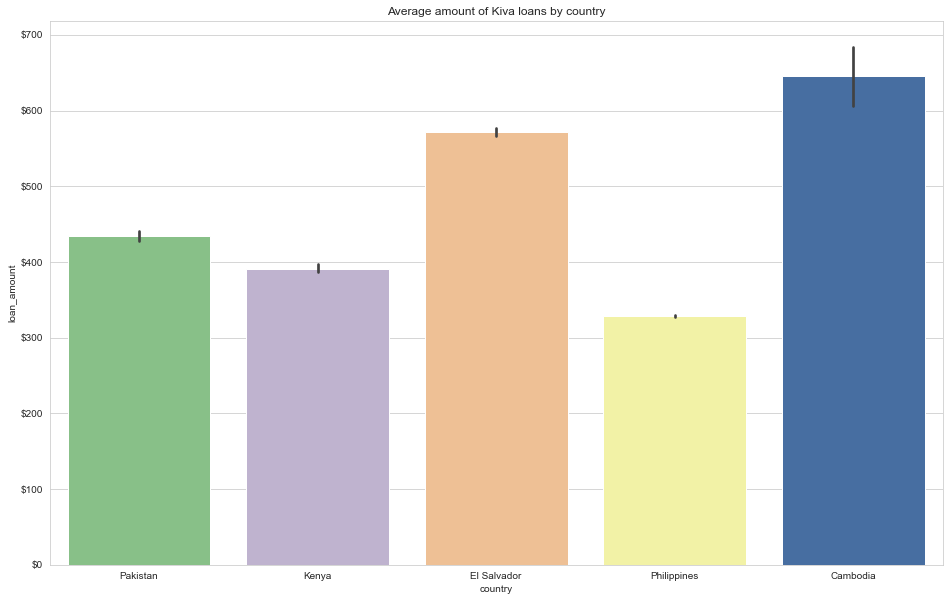

In [40]:
f, ax = plt.subplots(figsize=(16,10))
sns.barplot(data=df, x="country", y="loan_amount")

fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) # to add $ sign in front of the amount on y-axis
plt.title('Average amount of Kiva loans by country')
plt.show()

2. To visualiza more data on this barplot, let's add 'gender' as hue, so that we can compare the average amount of loans granted to different countries by gender

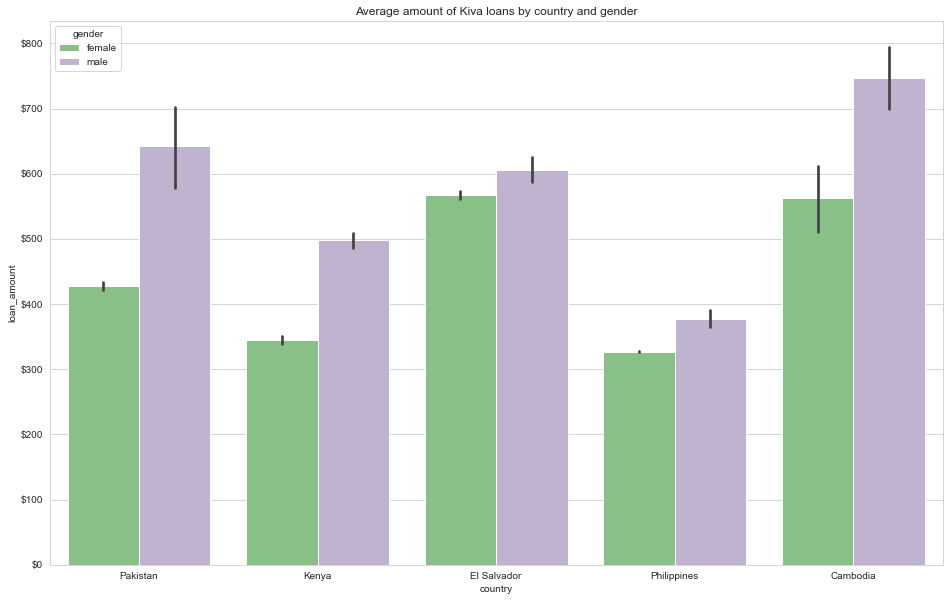

In [39]:

# Set style
sns.set_style("whitegrid")

# Set color palette
sns.set_palette("Accent")

f, ax = plt.subplots(figsize=(16,10))

sns.barplot(data=df, x="country", y="loan_amount", hue='gender')

fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) # to add $ sign in front of the amount on y-axis
plt.title('Average amount of Kiva loans by country and gender')
plt.show()

#### Interesting insights:
- On average, male recepients receive larger loans from Kiva.
- El Salvador appears to have the least disparity in loan amounts (by gender) while Pakistan seems to have the largest gap.



## Boxplots:
1. box plot to compare the distribution of loans by country.

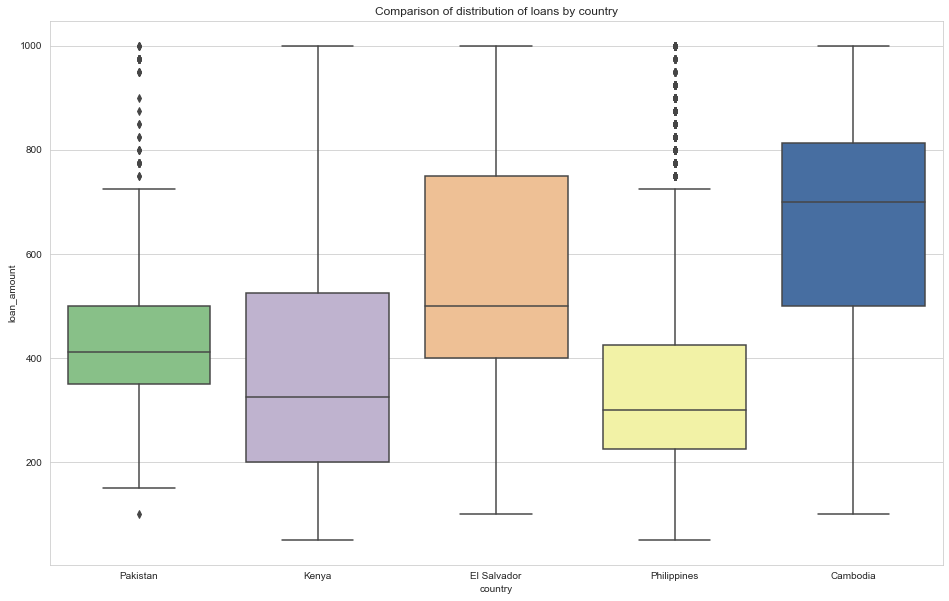

In [37]:
plt.figure(figsize=(16, 10))
sns.boxplot(data=df, x="country", y="loan_amount")
plt.title('Comparison of distribution of loans by country')
plt.show()

#### Insights:
- From the boxplot, we see that Kenya has the widest distribution.
- Cambodia is most likely to recieve the largest loan amount.

2. Boxplot to visualize loan by activity:

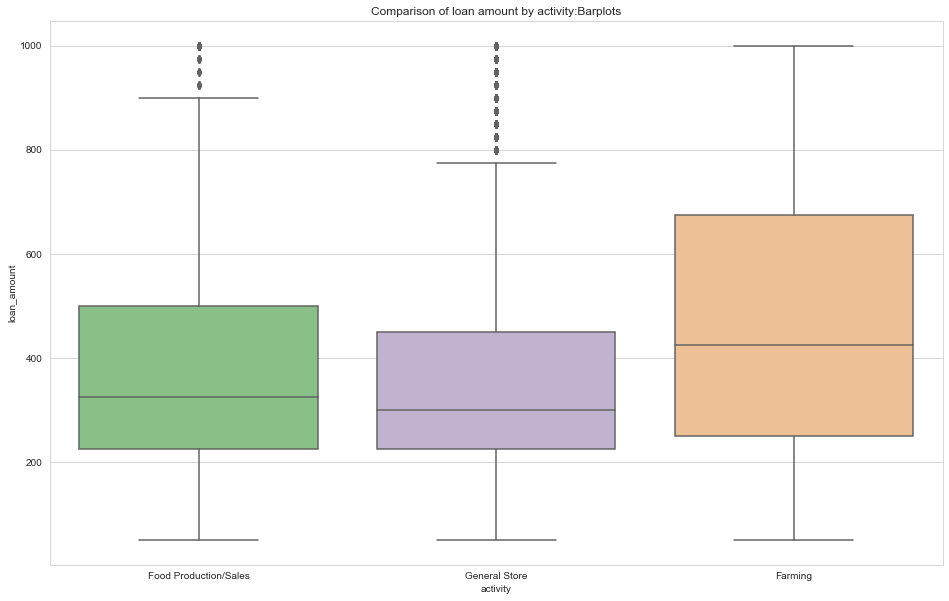

In [41]:
plt.figure(figsize=(16, 10))
sns.boxplot(data=df, x="activity", y="loan_amount")
plt.title('Comparison of loan amount by activity:Barplots')
plt.show()

Insights:
- On average, "Farming" receives the largest loan amount and also has the widest distribution and "General Store activity" the least.

#### Violin Plots:
1. Visualizing loan by activity:

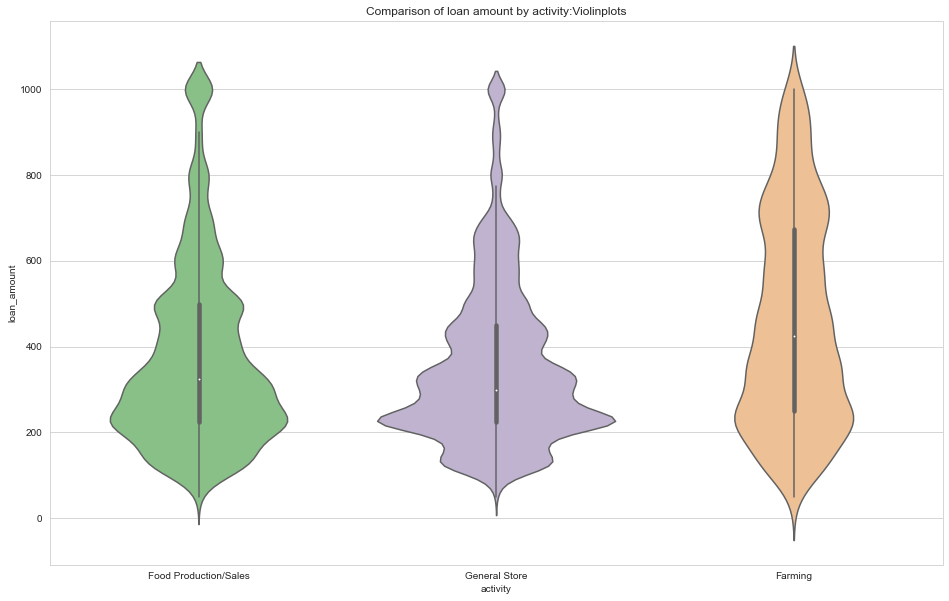

In [42]:
plt.figure(figsize=(16, 10))

sns.violinplot(data=df, x="activity", y = "loan_amount")
plt.title('Comparison of loan amount by activity:Violinplots')
plt.show()

2. violin plot that visualizes the distribution of loan amount by country:

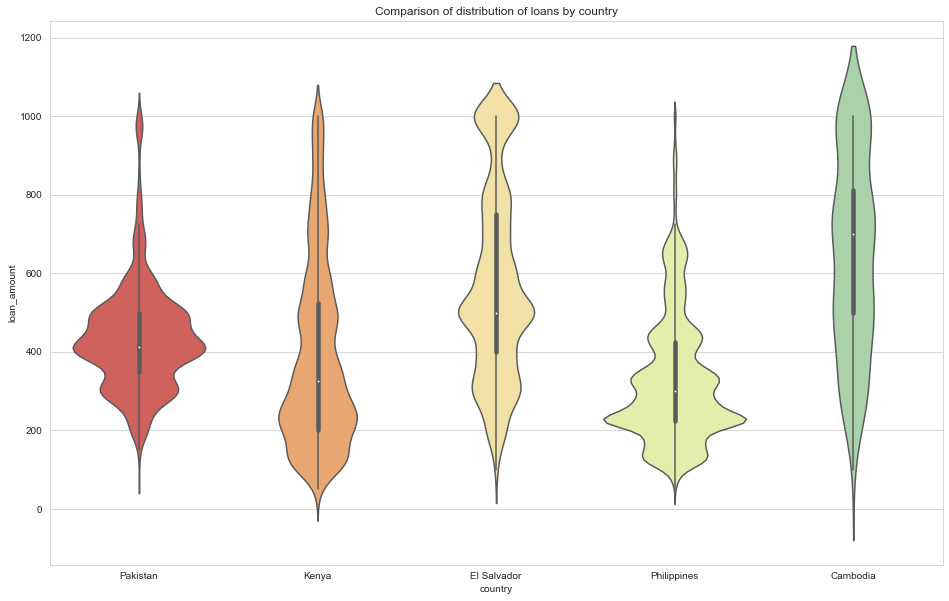

In [54]:
plt.figure(figsize=(16, 10))

sns.violinplot(data=df, x="country", y = "loan_amount")
plt.title('Comparison of distribution of loans by country')
plt.show()

3. Split Violin Plots: to visualize the distribution of loan amount by country, split by gender:



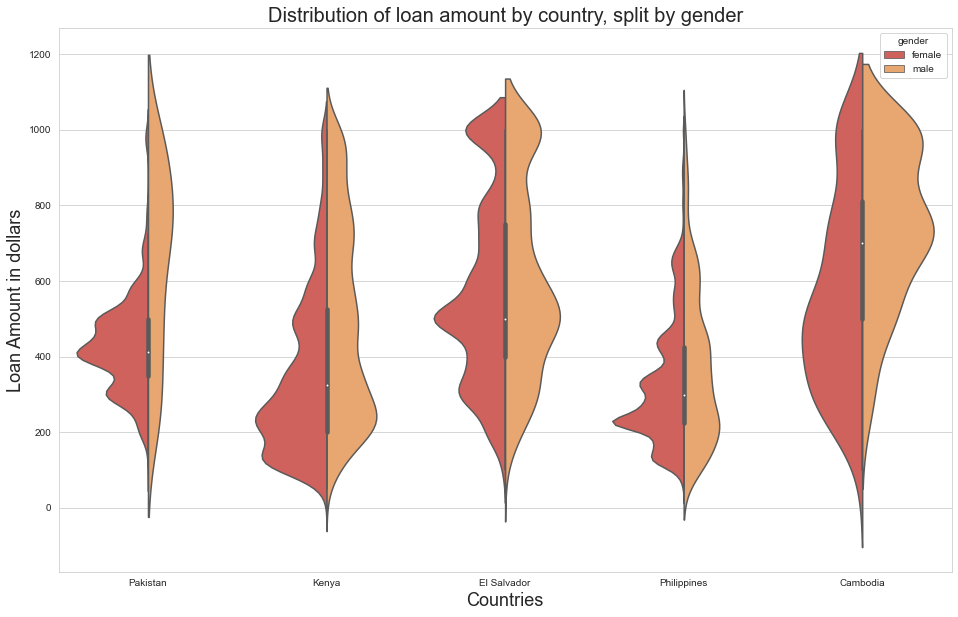

In [59]:
sns.set_palette("Spectral")
plt.figure(figsize=(16, 10))

sns.violinplot(data=df, x="country", y = "loan_amount", hue="gender", split=True)
plt.title('Distribution of loan amount by country, split by gender', fontsize=20)
plt.xlabel('Countries', fontsize=18)
plt.ylabel('Loan Amount in dollars', fontsize=18)
plt.show()

#### Conclusion:
From the above visualizations, we can conclude the following:
- In Pakistan, the average loan amount received by women is much less than the average loan amount received by men.
- The same can be said for Cambodia (more or less).
- In El Salvador, there is a fairly equal distribution of loans (total number of loans) between genders, as well as similar median loan amounts (on average).